# Basketball YOLOv8 using DirectML
Dataset obtained in:

https://universe.roboflow.com/roboflow-universe-projects/basketball-players-fy4c2/dataset/25

Version YOLOv8, not modified:

95% Train set (1140 img)

3% Valid set (32 img)

2% Train set (24 img)

## Librerías iniciales

In [1]:
#Ultralytics update
#!pip install -U ultralytics

In [2]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/home/alide/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
os.getcwd()

'/home/alide/Notebooks/ProyectoPC'

## Plotting random train samples

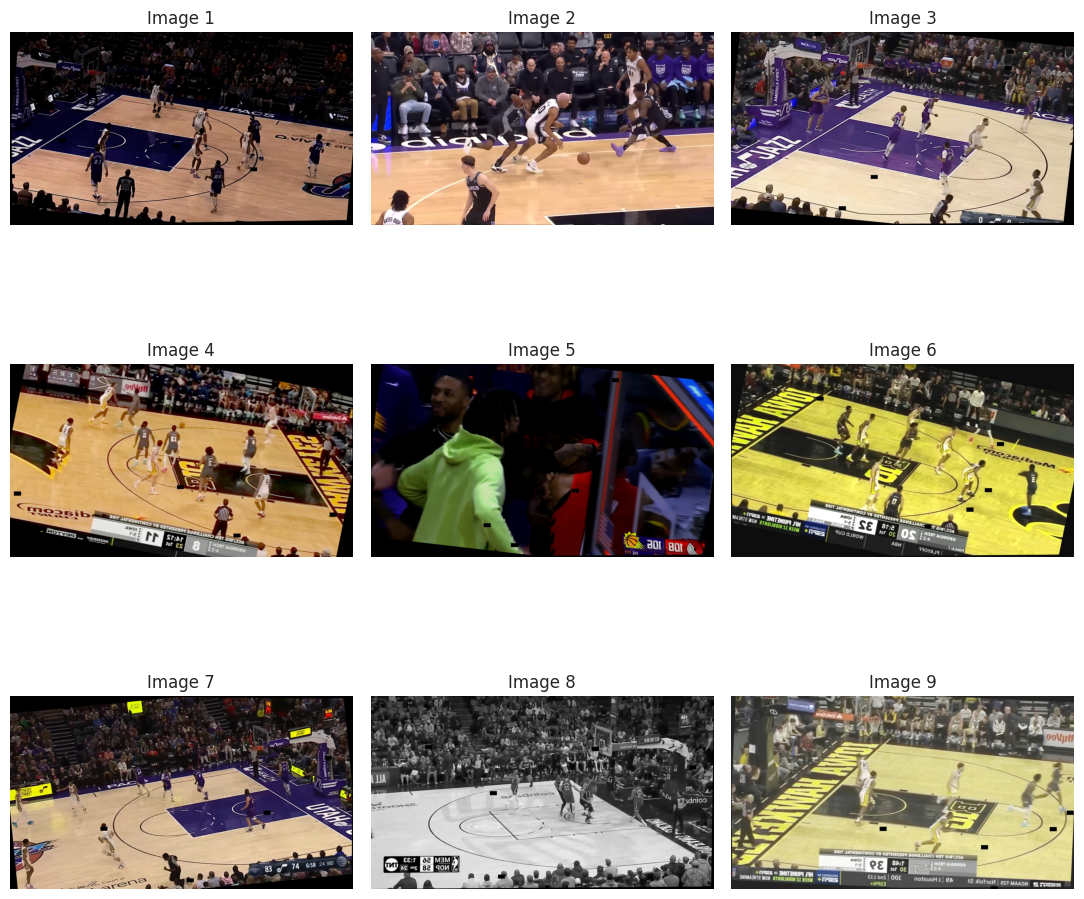

In [7]:
#Image directory for train samples
Image_dir = '/mnt/c/Users/alide/IA/Proyecto/BasketballYv8/train/images'

#To show samples
num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images for plotting
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

## YOLOv8 Training

In [8]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt") 

100%|██████████████████████████████████████████████████████████████████████████| 6.25M/6.25M [00:00<00:00, 9.50MB/s]



image 1/1 /mnt/c/Users/alide/IA/Proyecto/BasketballYv8/train/images/youtube-1_jpg.rf.771c14fa7ff8ea51f5f1be48cba8e331.jpg: 384x640 15 persons, 88.6ms
Speed: 6.1ms preprocess, 88.6ms inference, 9.7ms postprocess per image at shape (1, 3, 384, 640)


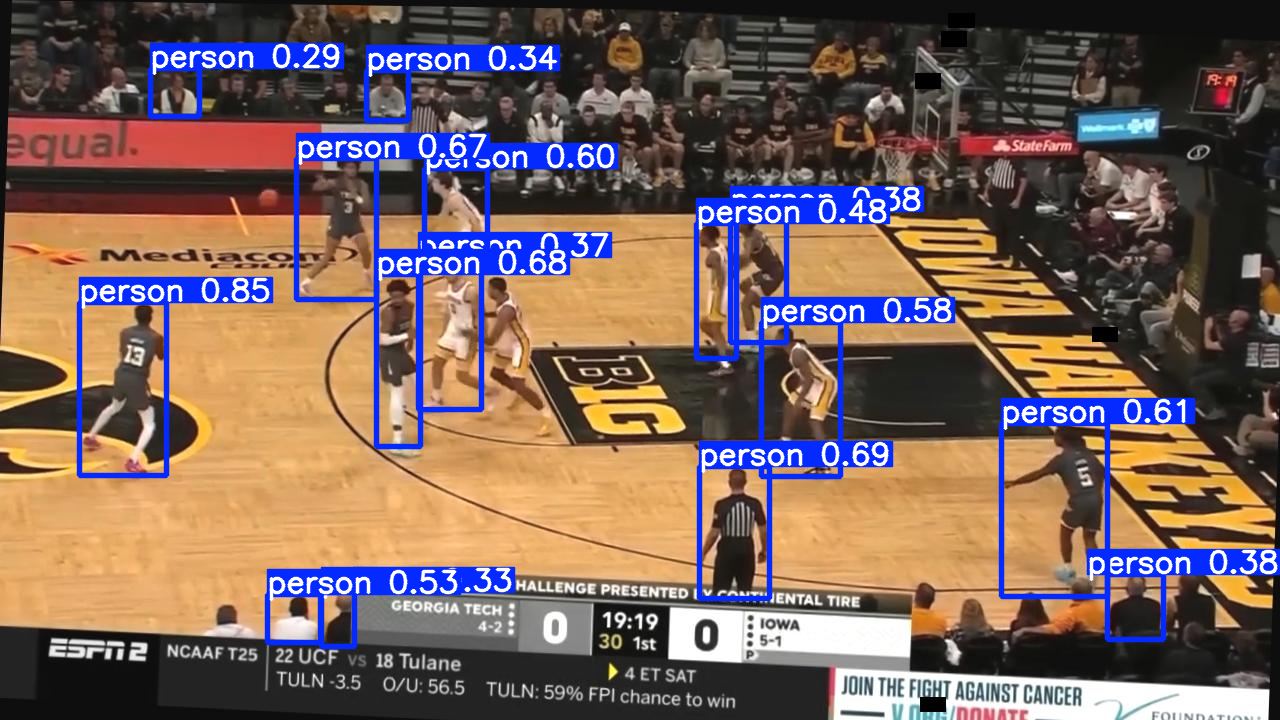

In [12]:
# Use the model to detect object
image = "/mnt/c/Users/alide/IA/Proyecto/BasketballYv8/train/images/youtube-1_jpg.rf.771c14fa7ff8ea51f5f1be48cba8e331.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [13]:
# Build from YAML and transfer weights
Training_model = YOLO('yolov8n.pt')

In [14]:
#Training
Result_Training_model = Training_model.train(data="/mnt/c/Users/alide/IA/Proyecto/BasketballYv8/data.yaml",
                                             epochs = 1, batch = 4, optimizer = 'auto')

Ultralytics 8.3.106 🚀 Python-3.10.14 torch-2.3.1+cu121 CPU (AMD Ryzen 5 5500)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/mnt/c/Users/alide/IA/Proyecto/BasketballYv8/data.yaml, epochs=1, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo

100%|████████████████████████████████████████████████████████████████████████████| 755k/755k [00:00<00:00, 3.71MB/s]
Dropped Escape call with ulEscapeCode : 0x03007703
Dropped Escape call with ulEscapeCode : 0x03007703


Overriding model.yaml nc=80 with nc=9

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /mnt/c/Users/alide/IA/Proyecto/BasketballYv8/train/labels... 1140 images, 1 backgrounds, 0 corrupt: 


train: New cache created: /mnt/c/Users/alide/IA/Proyecto/BasketballYv8/train/labels.cache


val: Scanning /mnt/c/Users/alide/IA/Proyecto/BasketballYv8/valid/labels... 32 images, 0 backgrounds, 0 corrupt: 100%


val: New cache created: /mnt/c/Users/alide/IA/Proyecto/BasketballYv8/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1         0G      1.809       2.55      1.357        110        640: 100%|██████████| 285/285 [04:05<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:0


                   all         32        477        0.5      0.245      0.293      0.131

1 epochs completed in 0.070 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.106 🚀 Python-3.10.14 torch-2.3.1+cu121 CPU (AMD Ryzen 5 5500)
Model summary (fused): 72 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:0


                   all         32        477        0.5      0.246      0.293      0.131
                  Ball         18         18      0.877     0.0556     0.0564     0.0451
                  Hoop         22         22          1          0    0.00896    0.00644
                Period         22         23          0          0     0.0581     0.0212
                Player         31        253      0.761      0.739      0.741      0.315
                   Ref         28         55      0.689      0.403      0.571      0.234
            Shot Clock         19         19          0          0     0.0797     0.0242
             Team Name         10         20     0.0843       0.05      0.122      0.023
           Team Points         22         45      0.463      0.652      0.584      0.292
        Time Remaining         22         22      0.629      0.318      0.415      0.219
Speed: 0.8ms preprocess, 30.2ms inference, 0.0ms loss, 6.5ms postprocess per image
Results saved to runs/detec

## Post-training Results

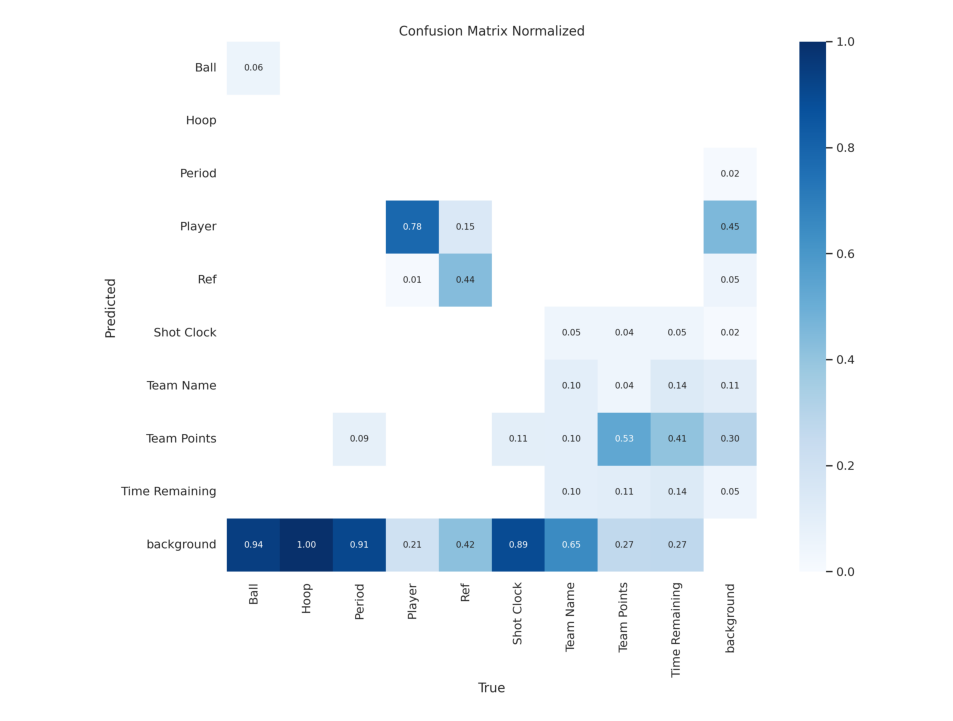

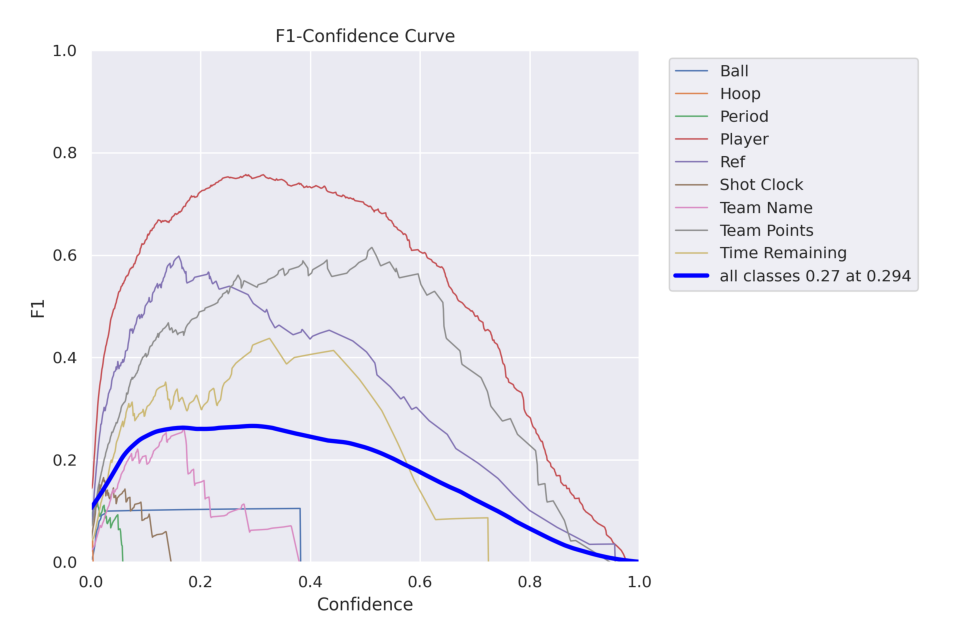

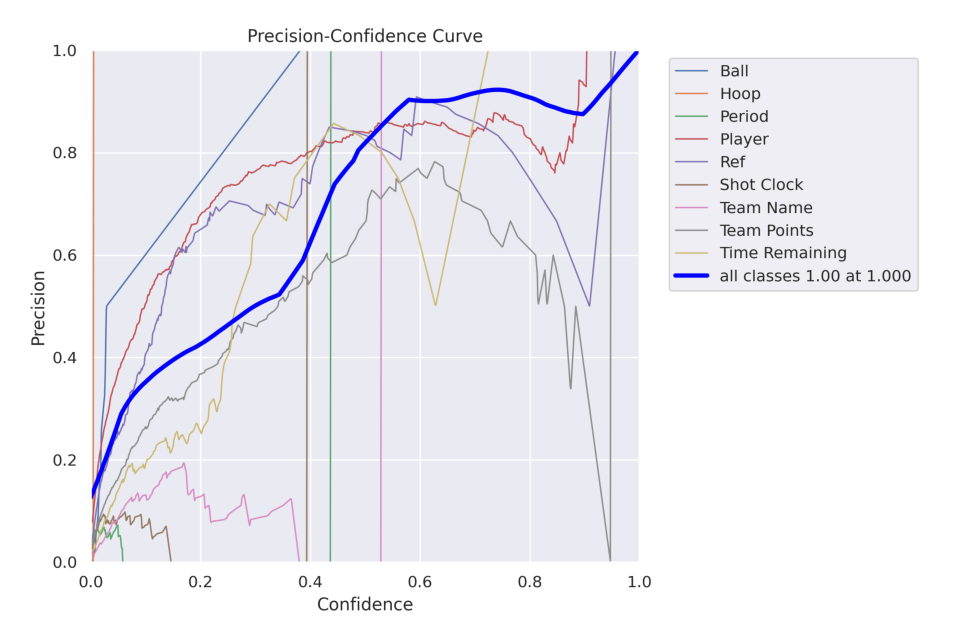

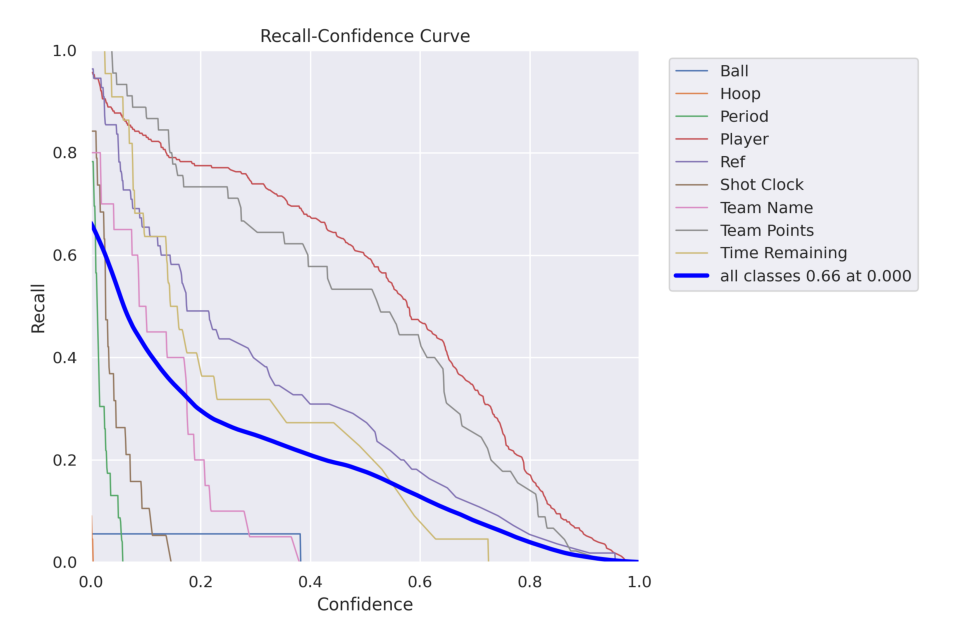

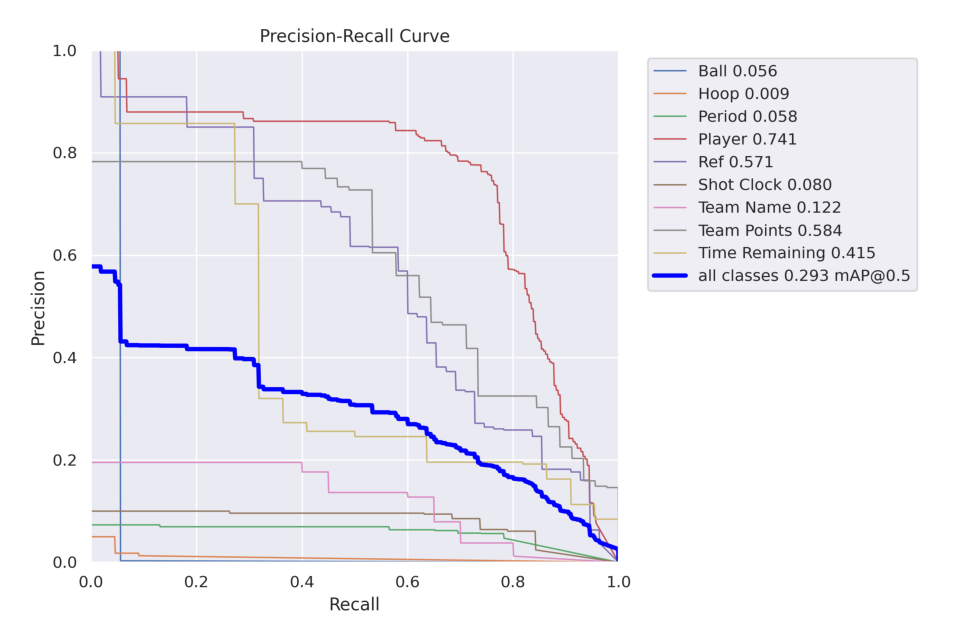

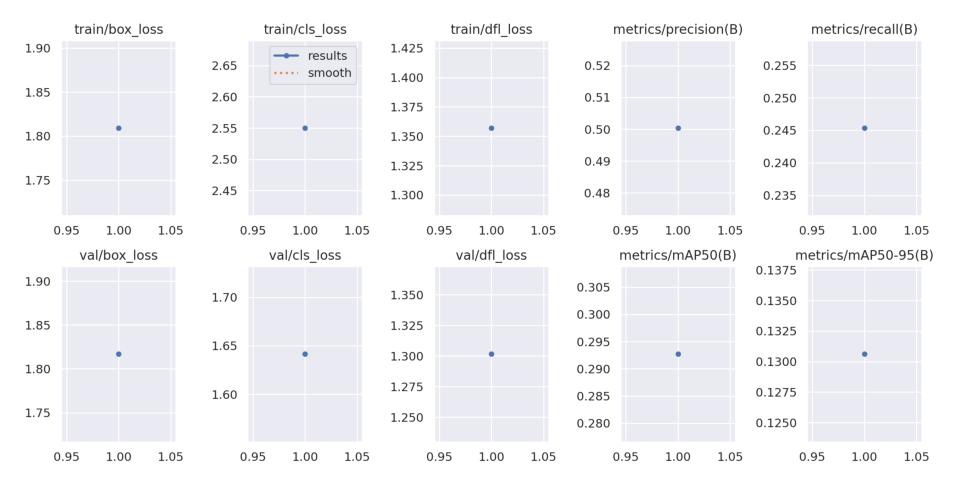

In [16]:
#Function for showing results
def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        if img is None:
            print(f"❌ Could not read image: {image_path}")
            continue
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = '/home/alide/Notebooks/ProyectoPC/runs/detect/train'

# Display the images
display_images(post_training_files_path, image_files)

## Best performing model and example

In [18]:
# Loading the best performing model
Final_model = YOLO('/home/alide/Notebooks/ProyectoPC/runs/detect/train/weights/best.pt')

# Evaluating the model on the validset
metrics = Final_model.val(split = 'val')

# final results 
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics 8.3.106 🚀 Python-3.10.14 torch-2.3.1+cu121 CPU (AMD Ryzen 5 5500)
Model summary (fused): 72 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /mnt/c/Users/alide/IA/Proyecto/BasketballYv8/valid/labels.cache... 32 images, 0 backgrounds, 0 corrupt
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:0


                   all         32        477        0.5      0.246      0.293      0.131
                  Ball         18         18      0.877     0.0556     0.0564     0.0451
                  Hoop         22         22          1          0    0.00896    0.00644
                Period         22         23          0          0     0.0581     0.0212
                Player         31        253      0.761      0.739      0.741      0.315
                   Ref         28         55      0.689      0.403      0.571      0.234
            Shot Clock         19         19          0          0     0.0797     0.0242
             Team Name         10         20     0.0843       0.05      0.122      0.023
           Team Points         22         45      0.463      0.652      0.584      0.292
        Time Remaining         22         22      0.629      0.318      0.415      0.219
Speed: 0.9ms preprocess, 32.7ms inference, 0.0ms loss, 6.8ms postprocess per image
Results saved to runs/detec

### Exporting the model

In [19]:
#Install dependencies
!pip install onnx
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 10.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.10.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 6.30.2 which is incompatible.
tensorflow-cpu 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 6.30.2 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 10.0 MB/s eta 0:00:0000:0100:01


In [20]:
#Export the model
Final_model.export(format='onnx')

Ultralytics 8.3.106 🚀 Python-3.10.14 torch-2.3.1+cu121 CPU (AMD Ryzen 5 5500)

PyTorch: starting from '/home/alide/Notebooks/ProyectoPC/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 13, 8400) (5.9 MB)
requirements: Ultralytics requirement ['onnxslim'] not found, attempting AutoUpdate...
requirements: ❌ AutoUpdate skipped (offline)

ONNX: starting export with onnx 1.17.0 opset 17...
ONNX: simplifier failure: No module named 'onnxslim'
ONNX: export success ✅ 0.5s, saved as '/home/alide/Notebooks/ProyectoPC/runs/detect/train/weights/best.onnx' (11.7 MB)

Export complete (0.6s)
Results saved to /home/alide/Notebooks/ProyectoPC/runs/detect/train/weights
Predict:         yolo predict task=detect model=/home/alide/Notebooks/ProyectoPC/runs/detect/train/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/home/alide/Notebooks/ProyectoPC/runs/detect/train/weights/best.onnx imgsz=640 data=/mnt/c/Users/alide/IA/Proyecto/Bas

'/home/alide/Notebooks/ProyectoPC/runs/detect/train/weights/best.onnx'

### Example using Final_Model with the same img used with the pre trained model


image 1/1 /mnt/c/Users/alide/IA/Proyecto/BasketballYv8/train/images/youtube-1_jpg.rf.771c14fa7ff8ea51f5f1be48cba8e331.jpg: 384x640 13 Players, 1 Ref, 5 Team Pointss, 35.1ms
Speed: 1.3ms preprocess, 35.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


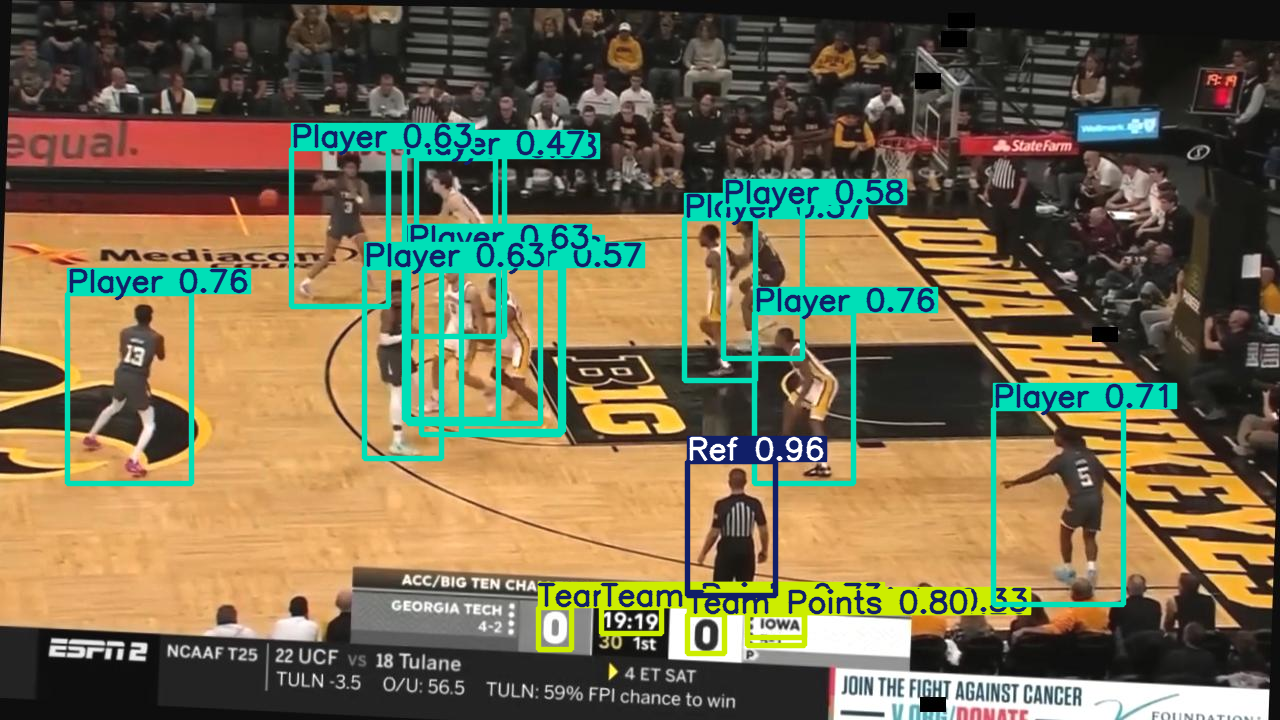

In [21]:
image = "/mnt/c/Users/alide/IA/Proyecto/BasketballYv8/train/images/youtube-1_jpg.rf.771c14fa7ff8ea51f5f1be48cba8e331.jpg"
result_predict = Final_model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

## FInal Model architecture

In [22]:
Final_model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
   